In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# importing necessary libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading dataset from google drive using google colab
df = pd.read_csv('/content/gdrive/MyDrive/stackOverflow/strackoverflow.csv',index_col=0)
df.head()

,Text,Tags
2,aspnet site maps has anyone got experience cre...,"['sql', 'asp.net']"
4,adding scripting functionality to net applicat...,"['c#', '.net']"
5,should i use nested classes in this case i am ...,['c++']
6,homegrown consumption of web services i have b...,['.net']
8,automatically update version number i would li...,['c#']


## Exploratory Data Analysis(EDA)

In [ ]:
# Basic information about the dataset
print('Number of rows : ',df.shape[0])
print('Number of columns: ',df.shape[1])

Number of rows :  10923
Number of columns:  2


In [ ]:
# check duplicate
df.duplicated().sum()


0

In [ ]:
# check null value
df.isnull().sum()

Text    0
Tags    1
dtype: int64

- Thre is a null value in the Tags column. We will remove that particular rows that contains null value

In [ ]:
# Remove null value
df.dropna(inplace=True)

## Analysis of Tags

In [ ]:
# check data type of Tags column
print(df['Tags'].iloc[0])
type(df['Tags'].iloc[0])

['sql', 'asp.net']


str

In [ ]:
# covert string  to list
import ast
df['Tags']= df['Tags'].apply(lambda x: ast.literal_eval(x))

In [ ]:
# creating a new column which contain tag count in each row
df['Tag_count'] = df['Tags'].apply(lambda x: len(x))

In [ ]:
df.head()

,Text,Tags,Tag_count
2,aspnet site maps has anyone got experience cre...,"[sql, asp.net]",2
4,adding scripting functionality to net applicat...,"[c#, .net]",2
5,should i use nested classes in this case i am ...,[c++],1
6,homegrown consumption of web services i have b...,[.net],1
8,automatically update version number i would li...,[c#],1


In [ ]:
# creating a new column in which Tags are converted into string  
df['str_tags'] = df['Tags'].apply(" ".join)

In [ ]:
df.head()

,Text,Tags,Tag_count,str_tags
2,aspnet site maps has anyone got experience cre...,"[sql, asp.net]",2,sql asp.net
4,adding scripting functionality to net applicat...,"[c#, .net]",2,c# .net
5,should i use nested classes in this case i am ...,[c++],1,c++
6,homegrown consumption of web services i have b...,[.net],1,.net
8,automatically update version number i would li...,[c#],1,c#


In [ ]:
#  number of tags per question
df['Tag_count'].value_counts()

1    8602
2    2125
3     175
4      20
Name: Tag_count, dtype: int64

#### Total number of unique tags

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#by default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = vectorizer.fit_transform(df['str_tags'])
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 10922
Number of unique tags : 20


In [ ]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:10])

Some of the tags we have : ['.net', 'android', 'asp.net', 'c', 'c#', 'c++', 'css', 'html', 'ios', 'iphone']


## Number of times a tag appeared

In [ ]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))
print(freqs)
print('------------------------------------->>')
print(result)

[1160  372  466  501 2120 1039  311  424   48  556 1565  913  589  318
  346  689  961  314  311  454]
------------------------------------->>
{'.net': 1160, 'android': 372, 'asp.net': 466, 'c': 501, 'c#': 2120, 'c++': 1039, 'css': 311, 'html': 424, 'ios': 48, 'iphone': 556, 'java': 1565, 'javascript': 913, 'jquery': 589, 'mysql': 318, 'objective-c': 346, 'php': 689, 'python': 961, 'ruby': 314, 'ruby-on-rails': 311, 'sql': 454}


In [ ]:
#convert this dictionary into csv files.
tag_df = pd.DataFrame(list(result.items()),columns = ['Tags','count']) 
tag_df.head()

,Tags,count
0,.net,1160
1,android,372
2,asp.net,466
3,c,501
4,c#,2120


In [ ]:
tag_df_sorted = tag_df.sort_values(['count'], ascending=False) #bigger to smaller
tag_counts = tag_df_sorted['count'].values
print(tag_df_sorted)
print('*'*70)
print(tag_counts)

             Tags  count
4              c#   2120
10           java   1565
0            .net   1160
5             c++   1039
16         python    961
11     javascript    913
15            php    689
12         jquery    589
9          iphone    556
3               c    501
2         asp.net    466
19            sql    454
7            html    424
1         android    372
14    objective-c    346
13          mysql    318
17           ruby    314
6             css    311
18  ruby-on-rails    311
8             ios     48
**********************************************************************
[2120 1565 1160 1039  961  913  689  589  556  501  466  454  424  372
  346  318  314  311  311   48]


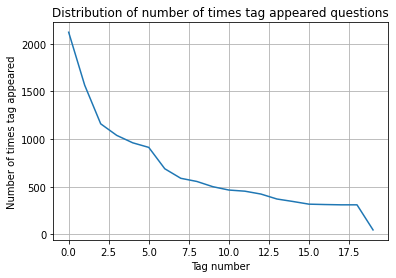

In [ ]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

In [ ]:
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
#Converting list of lists into single list, we will get [[3], [4], [2], [2], [3]] and we are converting this to [3, 4, 2, 2, 3]
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])

We have total 10922 datapoints.
[2, 2, 1, 1, 1]


In [ ]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 4
Minimum number of tags per question: 1
Avg. number of tags per question: 1.232100


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


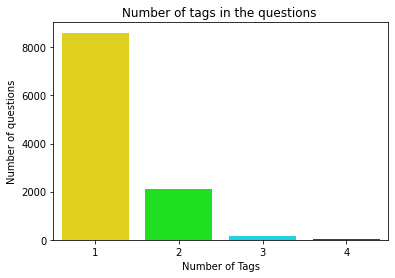

In [ ]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 4
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 1.232
4. Most of the questions are having 1 or 2 tags

### Most Frequent Tags

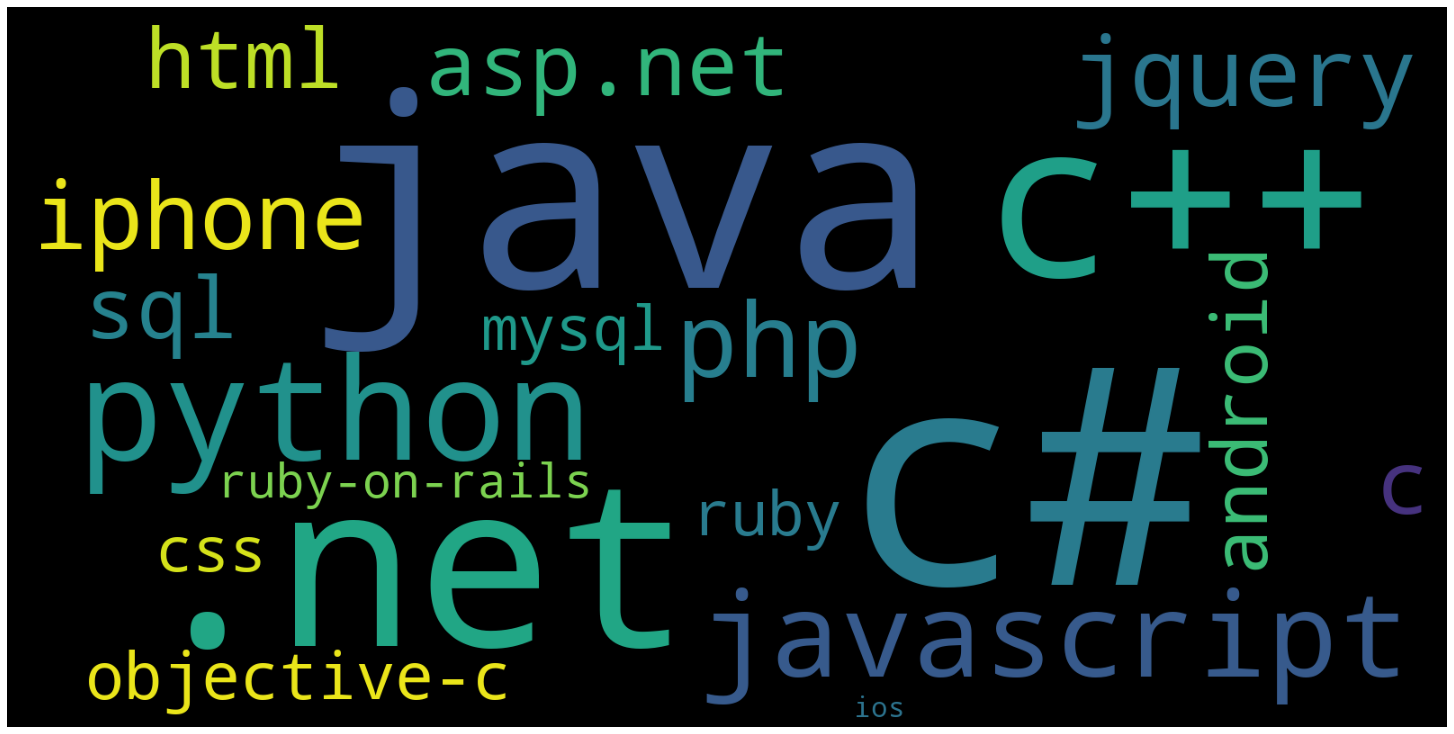

In [ ]:
# Ploting word cloud
# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


<b>Observations:</b><br />
A look at the word cloud shows that "c#", "java", "c++", ".net" are some of the most frequent tags.

### The top 15 tags

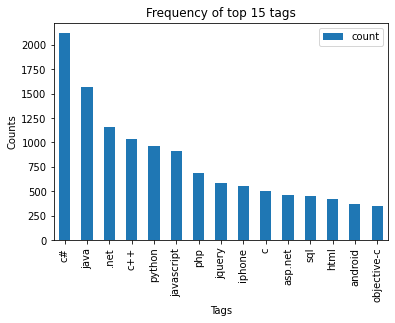

In [ ]:
i=np.arange(15)
tag_df_sorted.head(15).plot(kind='bar')
plt.title('Frequency of top 15 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3.iphone, Android are among the top most frequent operating systems.

# Model Building

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score

### Preparing target column [y]

In [ ]:
y = df['Tags']
y

2                              [sql, asp.net]
4                                  [c#, .net]
5                                       [c++]
6                                      [.net]
8                                        [c#]
                         ...                 
75708                            [c#, python]
75711                                [iphone]
75721                                    [c#]
75733    [java, iphone, objective-c, android]
75737                                   [c++]
Name: Tags, Length: 10922, dtype: object

- As our problem is **Multi-label Classification** problem so we need to convert y into multi-label bininarizer

In [ ]:
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(df['Tags'])
y

array([[0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
multilabel.classes_

array(['.net', 'android', 'asp.net', 'c', 'c#', 'c++', 'css', 'html',
       'ios', 'iphone', 'java', 'javascript', 'jquery', 'mysql',
       'objective-c', 'php', 'python', 'ruby', 'ruby-on-rails', 'sql'],
      dtype=object)

In [ ]:
# convert y into dataframe
y_df = pd.DataFrame(y, columns=multilabel.classes_)
y_df

,.net,android,asp.net,c,c#,c++,css,html,ios,iphone,java,javascript,jquery,mysql,objective-c,php,python,ruby,ruby-on-rails,sql
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10917,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10918,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10919,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10920,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


# Prepraring X

In [ ]:
# initializing tfidf 
tfidf = TfidfVectorizer(analyzer='word',ngram_range=(1,3))
X = tfidf.fit_transform(df['Text'])


In [ ]:
# check size of X and y
X.shape, y.shape

((10922, 1417786), (10922, 20))

In [ ]:
# Train - Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state =0)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8737, 1417786)
(8737, 20)


###  Applying Logistic Regression with OneVsRest Classifier

In [ ]:

classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'))
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.43249427917620137
macro f1 score : 0.6092220970816189
micro f1 scoore : 0.64060649135276
hamming loss : 0.03471395881006865
Precision recall report :
               precision    recall  f1-score   support

           0       0.73      0.37      0.50       214
           1       1.00      0.69      0.82        71
           2       0.82      0.41      0.54        91
           3       0.75      0.15      0.25        99
           4       0.75      0.43      0.54       420
           5       0.80      0.34      0.47       208
           6       0.98      0.62      0.76        69
           7       0.53      0.36      0.43        70
           8       0.00      0.00      0.00         6
           9       0.97      0.56      0.71       128
          10       0.94      0.63      0.75       302
          11       0.86      0.55      0.67       191
          12       0.92      0.74      0.82       115
          13       0.91      0.67      0.77        48
          14       0.79  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Applying Support Vector Machine with OneVsRest Classifier

In [ ]:


classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l1'))
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.5038901601830663
macro f1 score : 0.6755139110996841
micro f1 scoore : 0.7006145741878842
hamming loss : 0.031212814645308923
Precision recall report :
               precision    recall  f1-score   support

           0       0.65      0.41      0.50       214
           1       0.97      0.86      0.91        71
           2       0.85      0.55      0.67        91
           3       0.74      0.25      0.38        99
           4       0.68      0.48      0.56       420
           5       0.81      0.44      0.57       208
           6       0.96      0.71      0.82        69
           7       0.55      0.33      0.41        70
           8       0.00      0.00      0.00         6
           9       0.91      0.66      0.77       128
          10       0.94      0.74      0.83       302
          11       0.85      0.66      0.74       191
          12       0.92      0.86      0.89       115
          13       0.88      0.88      0.88        48
          14       0.81

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model test with Real data


In [ ]:
x = ['how to learn python and sql for datascience']
xt = tfidf.transform(x)
multilabel.inverse_transform(classifier.predict(xt))

[('python', 'sql')]